In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
df = pd.read_csv("epa-sea-level.csv")
df.head

<bound method NDFrame.head of      Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0             

<Axes: title={'center': 'Rise In Sea Level'}, xlabel='Year', ylabel='Sea Level(inches)'>

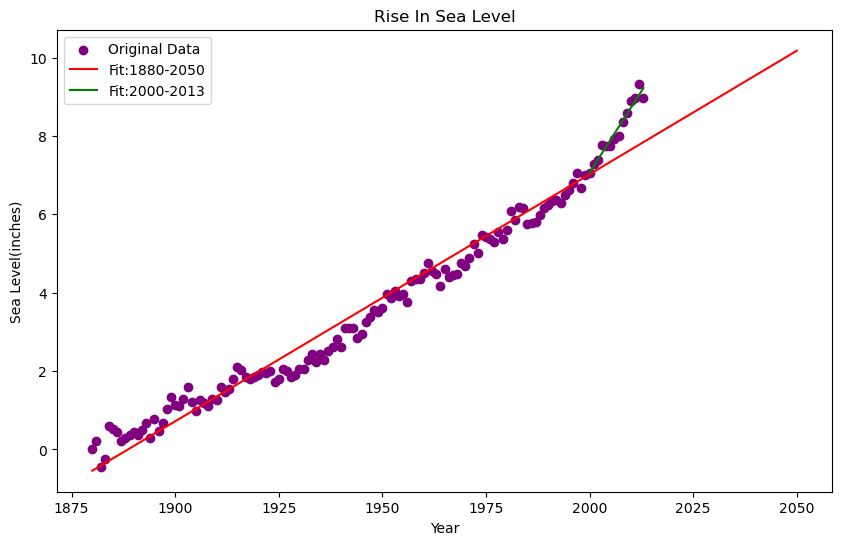

In [31]:
def draw_plot():
    
    df = pd.read_csv("epa-sea-level.csv")
    

    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], color="purple", label="Original Data")


    
    slope, intercept, r_value, p_value, std_err = linregress(df["Year"],df["CSIRO Adjusted Sea Level"])
    years_extended = pd.Series(range(df["Year"].min(), 2051))
    sea_levels_pred = intercept + slope * years_extended
    ax.plot(years_extended, sea_levels_pred, color = "red", label = "Fit:1880-2050")

    
    years_recent = range(2000, 2014)
    df_recent = df[df["Year"] >= 2000]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err = linregress(df_recent["Year"],df_recent["CSIRO Adjusted Sea Level"])
    sea_levels_pred_recent = intercept_recent + slope_recent * pd.Series(years_recent)
    ax.plot(years_recent, sea_levels_pred_recent, color = "green", label= "Fit:2000-2013")

    
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level(inches)")
    ax.set_title("Rise In Sea Level")
    ax.legend()

    
    
    plt.savefig('sea_level_plot.png')
    return plt.gca()
draw_plot()